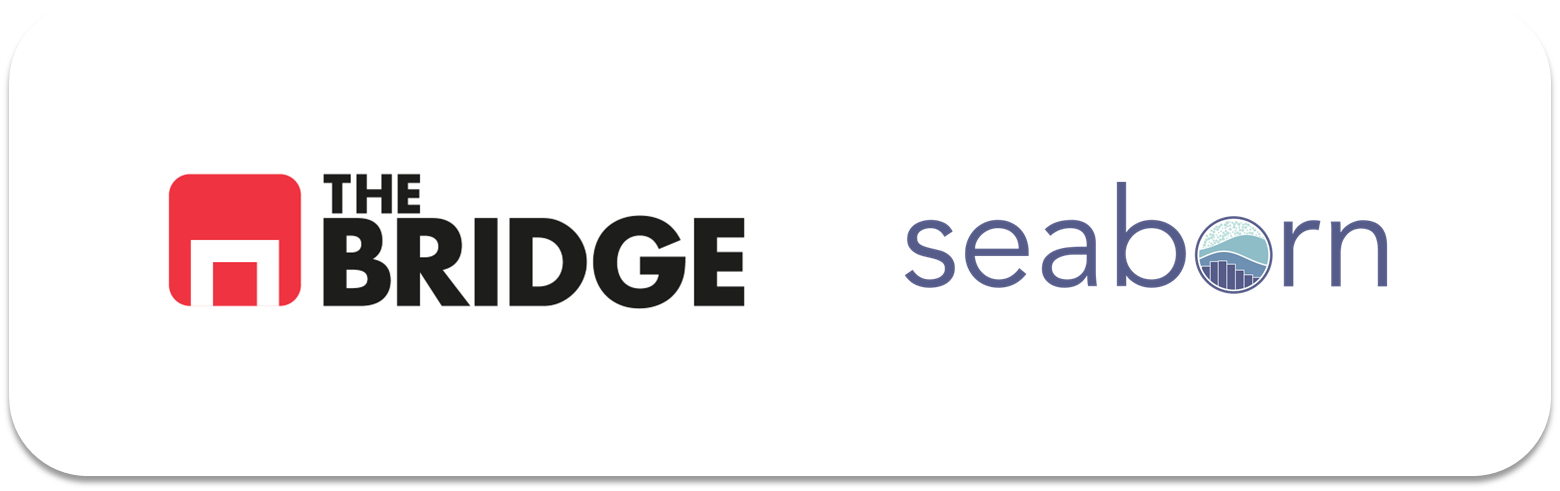

## PRACTICA OBLIGATORIA: VISUALIZACION Y PRESENTACION

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## #1 VISUALIZACION

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [2]:
df_california = pd.read_csv("/Users/lauragarcia/REPO_PRUEBA/ONLINE_DS_THEBRIDGE_Curso2025/03_Analisis_de_Datos/Sprint_08/Unidad_01/Practica_Obligatoria/data/california_cities.csv")
df_california

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,477,Yountville,38.403056,-122.362222,30.0,98.0,2933,1.531,1.531,0.000,3.966,3.966,0.000,0.00
478,478,Yreka,41.726667,-122.637500,787.0,2582.0,7765,10.053,9.980,0.073,26.036,25.847,0.188,0.72
479,479,YubaCity,39.134722,-121.626111,18.0,59.0,64925,14.656,14.578,0.078,37.959,37.758,0.201,0.53
480,480,Yucaipa,34.030278,-117.048611,798.0,2618.0,51367,27.893,27.888,0.005,72.244,72.231,0.013,0.02


In [3]:
df_california.dropna(inplace= True)

### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [115]:
#Función para diagrama de dispersión

def diagrama_dispersion(df, columna_x, columna_y, columna_cat = None, tamanio_punto=50.0, escala = 1, legenda = True):
    """
    Argumentos:
    df (pandas.DataFrame): DataFrame que contiene los datos.
    columna_x (str): Nombre de la columna para el eje X.
    columna_y (str): Nombre de la columna para el eje Y.
    columna_cat (str): Columna categorica que asigna el codigo de colores, por defecto es valor de la columna será None
    tamano_puntos (int): Tamaño de los puntos en el gráfico. Por defecto es 50, pero puede ser una columna del dataframe cuyos valores controlen el tamaño
    escala(opcinal, str): si es una str se tiene que reajustar el tamaño, por defecto es igual a 1 para no modificar
    leyenda (str): puedes elegir dos opciones: a si quieres una leyenda para colores y tamaños; b si quieres un colorbar y una leyenda para los tamaños
    
    """

    plt.figure(figsize=(20, 10))

    tamanio_punto_corregido = tamanio_punto * escala
    
    sns.scatterplot(data=df, x=columna_x, y=columna_y, hue=columna_cat, s=tamanio_punto_corregido, legend=False )

    plt.xlabel(columna_x)
    plt.ylabel(columna_y)
    for area in [100,200,300,400,500]:
        plt.scatter([],[], c="k", alpha = 0.3, s = area, label= str (area) + "Km$^2$") 
    plt.legend(frameon = False, title = "Area Ciudad Km2")
   
    if legenda == True :
        plt.colorbar(label = "log$_{10}$(poblacion)")

    else:
        for tamanio in [1,2,3,4,5,6,7]:
            plt.scatter([],[], cmap='inferno', s= tamanio, label = "log$_{10}$(poblacion)") 
        plt.legend(frameon = False, title = "Tamaño de la población")
    plt.show()




### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

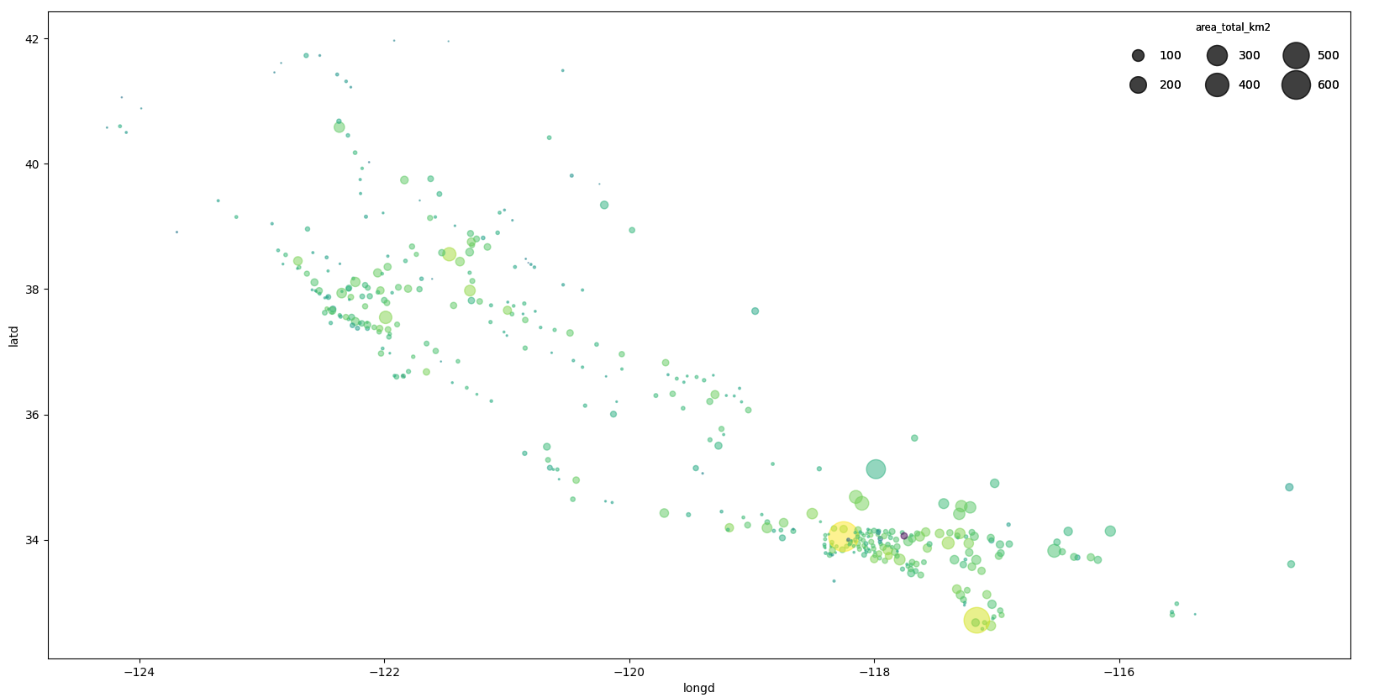

In [ ]:
df_california_modificado = df_california.copy()

df_california_modificado['log_poblacion']= np.log10(df_california_modificado['population_total'])


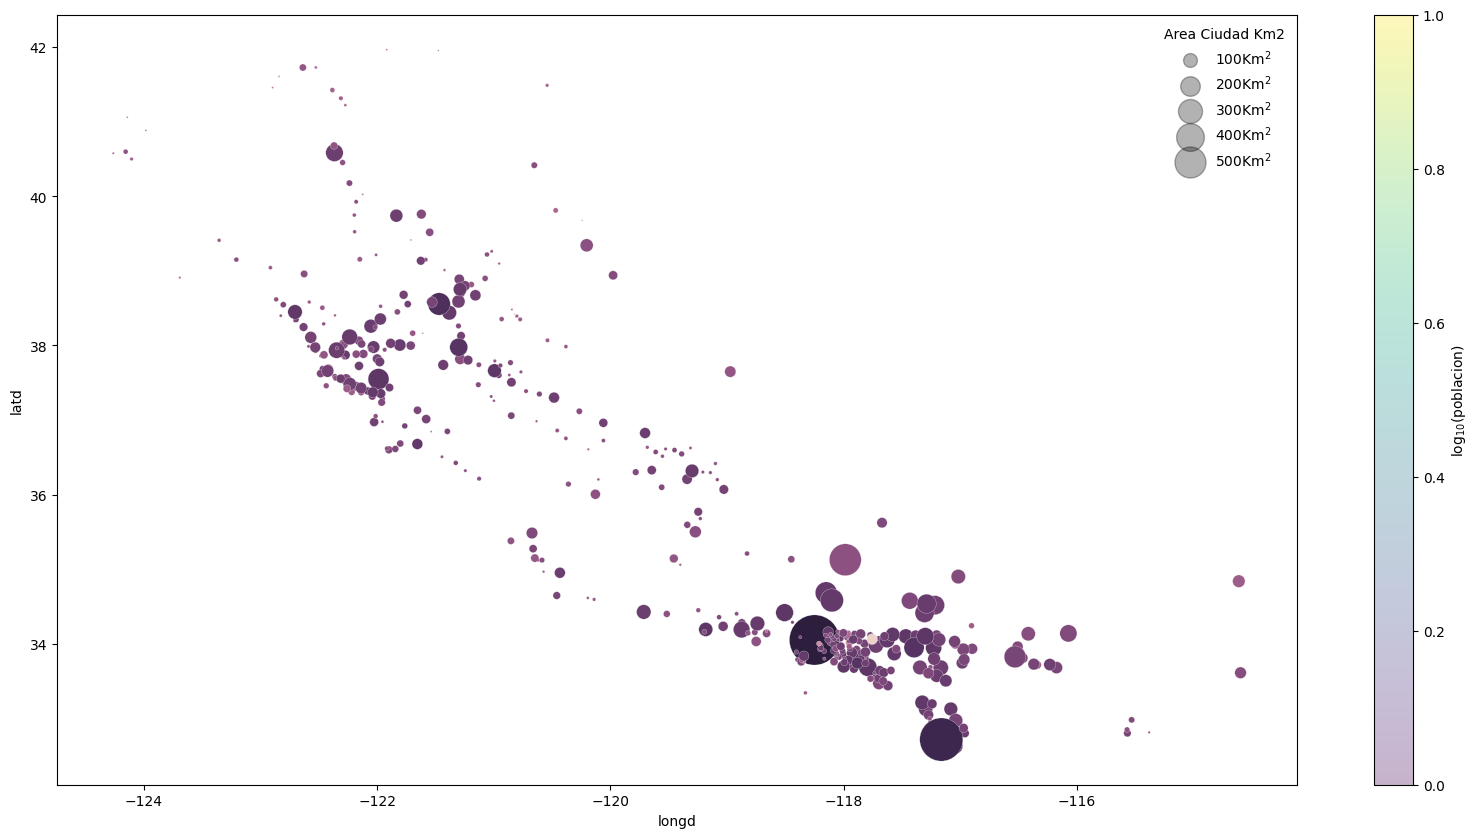

In [124]:
diagrama_dispersion(df_california_modificado, columna_x='longd', columna_y='latd', columna_cat= df_california_modificado['log_poblacion'], tamanio_punto= df_california_modificado['area_total_km2'], legenda= True)

## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

In [132]:
df_titanic =pd.read_csv('/Users/lauragarcia/Projects/DS_Online_Febr25_Exercises/03_Analisis_de_Datos/Sprint_08/Unidad_02/Practica_Obligatoria/data/titanic.csv')

In [ ]:
#Elimino las columnas con datos 'duplicados' o que no me aportan más imformacion
df_titanic.drop(["deck", "survived", "pclass","embarked"], axis = 1, inplace= True)

In [130]:
#Imputo la moda en embark-town para no tener nulos
df_titanic["emabark_town"] = df_titanic["embark_town"].fillna( df_titanic["embark_town"].mode())


In [135]:
# Imputo la media de edad en cada categoria para los valores faltantes
es_mujer = df_titanic.who == "woman"
es_hombre = df_titanic.who == "man"
es_ninio = df_titanic.who == "child" 

media_mujer = df_titanic.loc[es_mujer, "age"].mean()
media_hombre = df_titanic.loc[es_hombre, "age"].mean()
media_ninio = df_titanic.loc[es_ninio, "age"].mean()

es_edad_nulo = df_titanic.age.isna()

df_titanic.loc[es_mujer & es_edad_nulo, "age"] = media_mujer
df_titanic.loc[es_hombre & es_edad_nulo, "age"] = media_hombre
df_titanic.loc[es_ninio & es_edad_nulo, "age"] = media_ninio

# Ya tengo el dataset listo

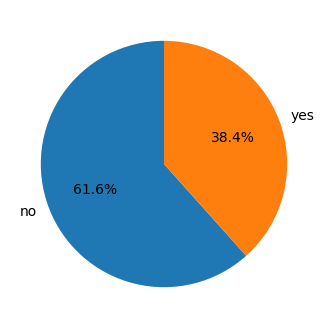

In [163]:
# 1- El titanic fue un accidente con una tasa de mortalidad alta.  Voy a hacer el porcentaje de mortalidad y voy a buscar algo con qué compararlo.
df_titanic['alive'].value_counts()
# vivos 342, muertos 549
df_titanic['alive'].count()
# total 891
tasa_mortalidad = (df_titanic['alive'].value_counts()/df_titanic['alive'].count() *100).round(2) 
tasa_mortalidad

data = df_titanic["alive"].value_counts()

fig,ax = plt.subplots(1,1,figsize = (4,4))

ax.pie(data.values,
        labels=data.index,
        autopct='%.1f%%', startangle= 90);

plt.savefig('Tasa de mortalidad.png')

Ejemplos de naufragios con alta tasa de mortalidad:
RMS Titanic:
En 1912, el Titanic se hundió en su viaje inaugural, causando la muerte de más de 1500 personas. 
Wilhelm Gustloff:
En 1945, el Wilhelm Gustloff se hundió, causando la muerte de más de 9000 personas, lo que lo convierte en uno de los naufragios más mortales de la historia. La tasa de mortalidad fue del 88%

Tasa de mortalidad por accidentes de barco actual:
Barcos de recreo:
La tasa de mortalidad en Estados Unidos es de aproximadamente 5.5 muertes por 100,000 embarcaciones registradas. 0,0055%

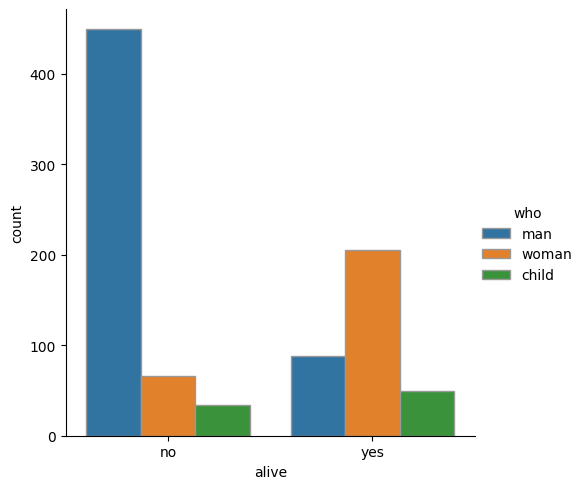

In [175]:
#2 - En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...
sns.catplot( x= "alive", 
            hue = "who",
            kind= "count", # me permite diferentes tipos de graficas sobre variables categoricas
            edgecolor = ".6",
            orient = "v",
            data = df_titanic.sort_values("alive"));

plt.savefig("mujeres y niños primeo.png")

In [210]:
cat_colx = "alive"
cat_coly = "who"
frecuencias_absolutas = df_titanic.groupby (cat_coly, as_index = False) [cat_colx].value_counts()
frecuencias_relativas = df_titanic.groupby (cat_coly, as_index = False) [cat_colx].value_counts(normalize = True)
print(frecuencias_absolutas)
print(frecuencias_relativas)

     who alive  count
0  child   yes     49
1  child    no     34
2    man    no    449
3    man   yes     88
4  woman   yes    205
5  woman    no     66
     who alive  proportion
0  child   yes    0.590361
1  child    no    0.409639
2    man    no    0.836127
3    man   yes    0.163873
4  woman   yes    0.756458
5  woman    no    0.243542


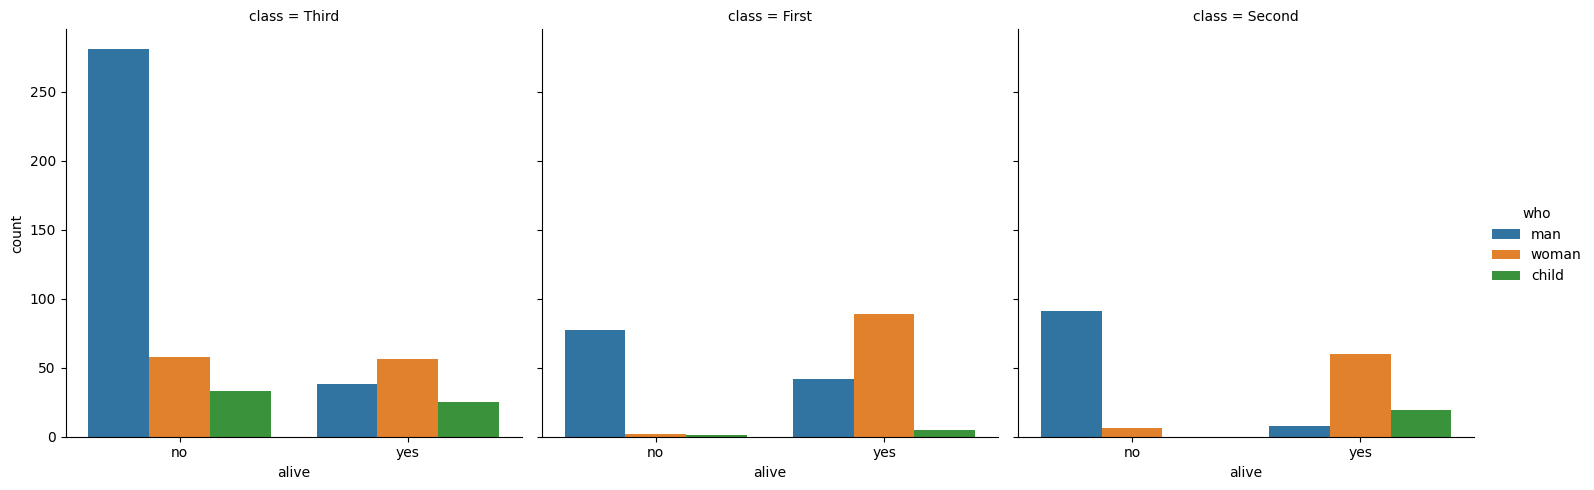

In [176]:
#3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
sns.catplot(x= "alive", col = "class", hue = "who", data = df_titanic, kind = "count")

plt.savefig("Dependiendo de la clase.png")

In [214]:
cat_colx = "alive"
cat_coly = "class"
frecuencias_absolutas = df_titanic.groupby (cat_coly, as_index = False) [cat_colx].value_counts()
frecuencias_relativas = df_titanic.groupby (cat_coly, as_index = False) [cat_colx].value_counts(normalize = True)
print(frecuencias_absolutas)
print(frecuencias_relativas)

    class alive  count
0   First   yes    136
1   First    no     80
2  Second    no     97
3  Second   yes     87
4   Third    no    372
5   Third   yes    119
    class alive  proportion
0   First   yes    0.629630
1   First    no    0.370370
2  Second    no    0.527174
3  Second   yes    0.472826
4   Third    no    0.757637
5   Third   yes    0.242363


In [215]:
frecuencias_relativas["proportion"] *= 100
frecuencias_relativas

,class,alive,proportion
0,First,yes,62.962963
1,First,no,37.037037
2,Second,no,52.717391
3,Second,yes,47.282609
4,Third,no,75.763747
5,Third,yes,24.236253


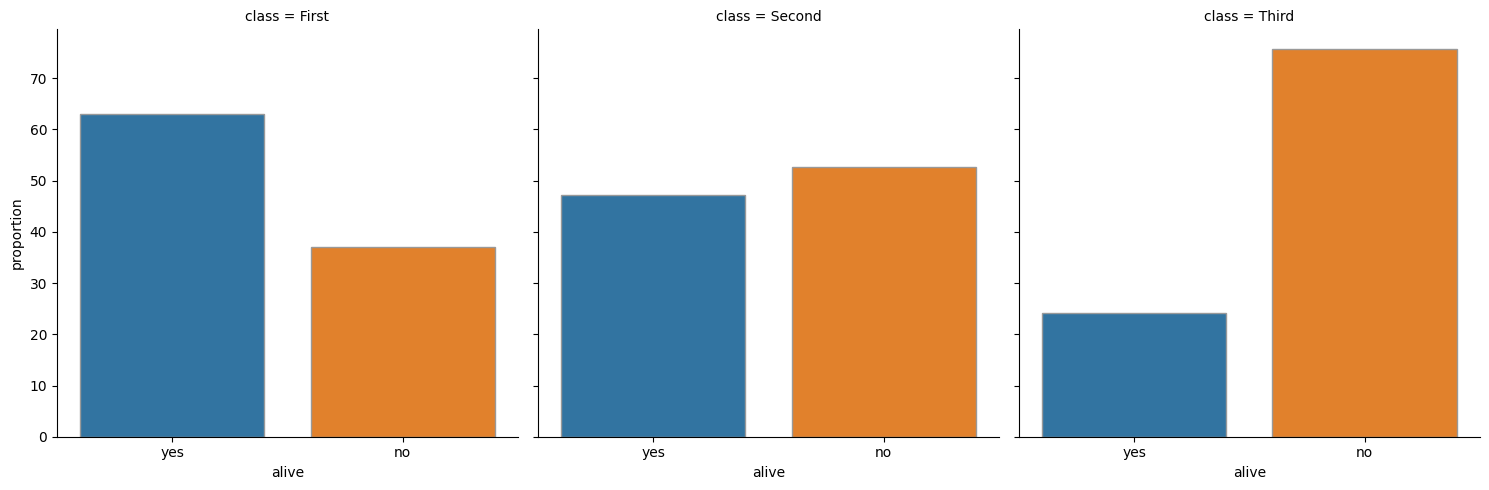

In [217]:
sns.catplot(x="alive",
            y = "proportion",
            col="class",
            hue = "alive",
            kind="bar", # Ojo, cambio el tipo de gráfico (ahora no "cuento" filas)
            edgecolor=".6",
            data=frecuencias_relativas);

plt.savefig("Supervivencia por clases.png")

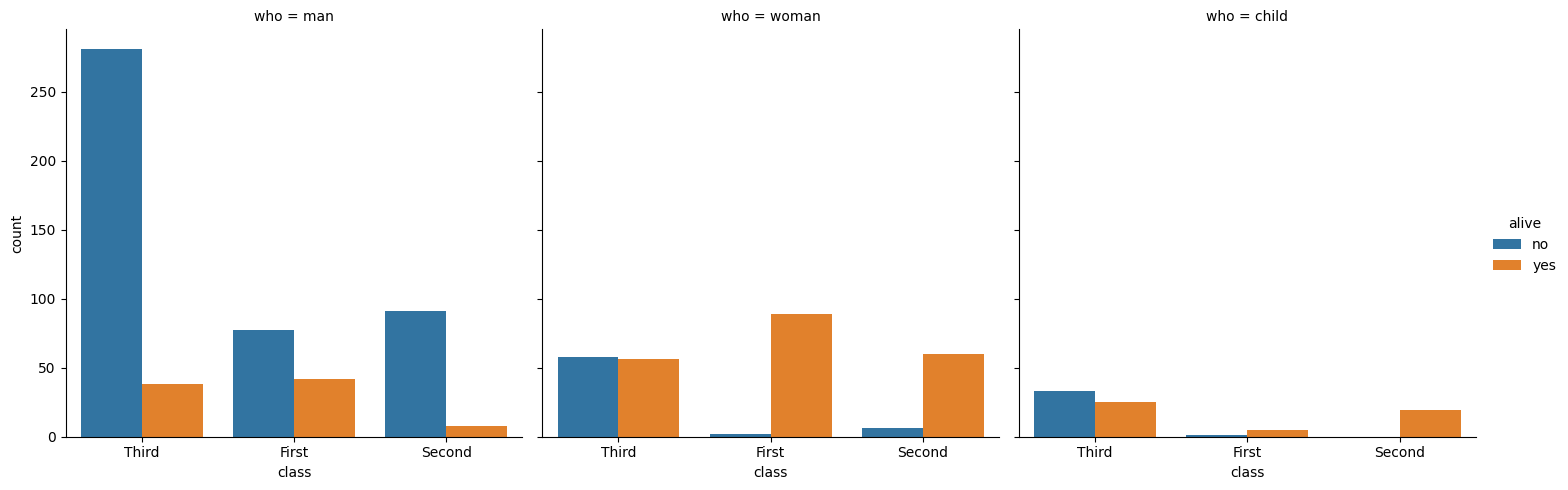

In [198]:
#4- ... las diferencias de tasas de supervivencia entre mujeres y niños. 
sns.catplot(x= "class", col = "who", hue = "alive", data = df_titanic, kind = "count")


plt.savefig("diferencias entre mujer y niño.png")

In [218]:
cat_colx = "class"
cat_coly = "who"
frecuencias_absolutas = df_titanic.groupby (cat_coly, as_index = False) [cat_colx].value_counts()
frecuencias_relativas = df_titanic.groupby (cat_coly, as_index = False) [cat_colx].value_counts(normalize = True)
print(frecuencias_absolutas)
print(frecuencias_relativas)

     who   class  count
0  child   Third     58
1  child  Second     19
2  child   First      6
3    man   Third    319
4    man   First    119
5    man  Second     99
6  woman   Third    114
7  woman   First     91
8  woman  Second     66
     who   class  proportion
0  child   Third    0.698795
1  child  Second    0.228916
2  child   First    0.072289
3    man   Third    0.594041
4    man   First    0.221601
5    man  Second    0.184358
6  woman   Third    0.420664
7  woman   First    0.335793
8  woman  Second    0.243542


In [219]:
frecuencias_relativas["proportion"] *= 100
frecuencias_relativas

,who,class,proportion
0,child,Third,69.879518
1,child,Second,22.891566
2,child,First,7.228916
3,man,Third,59.404097
4,man,First,22.160149
5,man,Second,18.435754
6,woman,Third,42.066421
7,woman,First,33.579336
8,woman,Second,24.354244


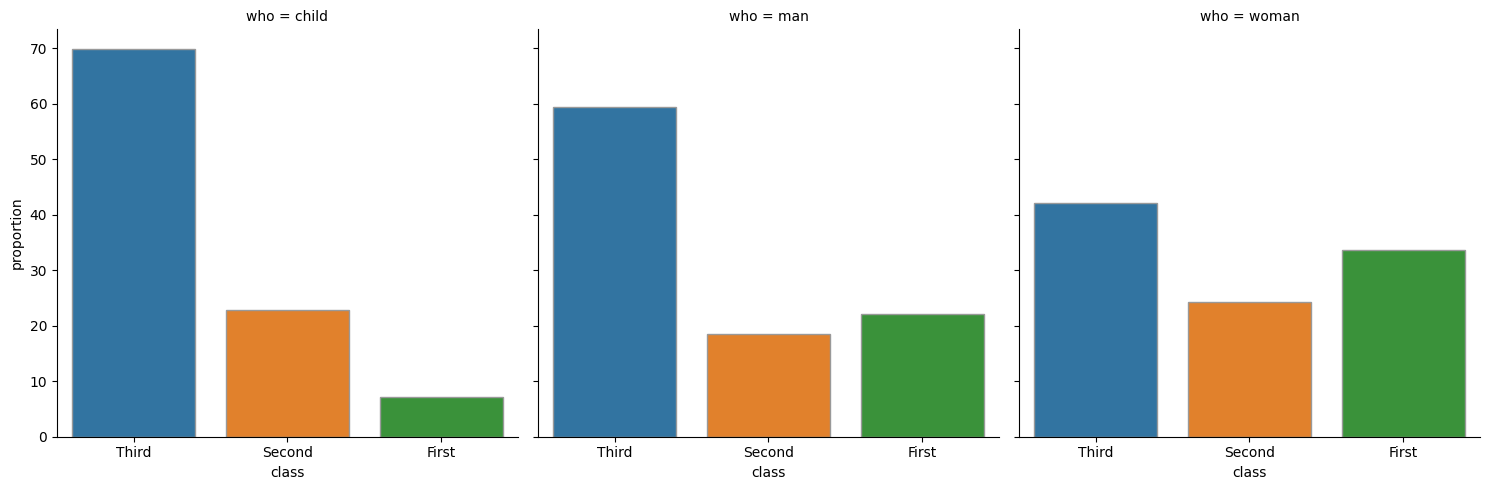

In [226]:
sns.catplot(x="class",
            y = "proportion",
            col="who",
            hue = "class",
            kind="bar", # Ojo, cambio el tipo de gráfico (ahora no "cuento" filas)
            edgecolor=".6",
            data=frecuencias_relativas);

plt.savefig('proporcion de niños y mujeres por clase.png')

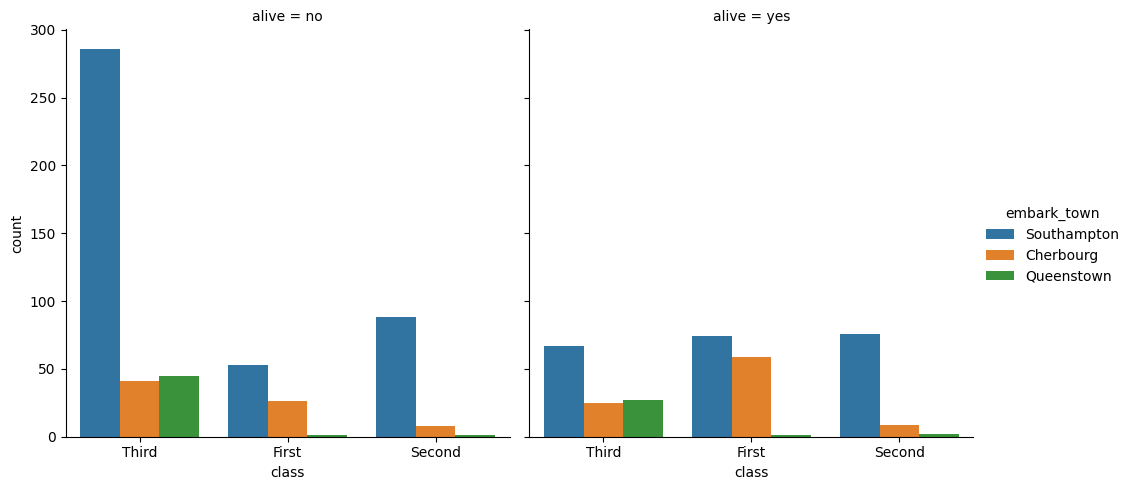

In [209]:
#5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.

sns.catplot(x= "class", col = "alive", hue = "embark_town", data = df_titanic, kind = "count")

#Aunque murieron mas los que montaron en Southamton, en realidad se ve que murieron más en funcion de la clase que embarrcó

plt.savefig("embarque tipo pasaje.png")

In [227]:
cat_colx = "class"
cat_coly = "embark_town"
frecuencias_absolutas = df_titanic.groupby (cat_coly, as_index = False) [cat_colx].value_counts()
frecuencias_relativas = df_titanic.groupby (cat_coly, as_index = False) [cat_colx].value_counts(normalize = True)
print(frecuencias_absolutas)
print(frecuencias_relativas)

   embark_town   class  count
0    Cherbourg   First     85
1    Cherbourg   Third     66
2    Cherbourg  Second     17
3   Queenstown   Third     72
4   Queenstown  Second      3
5   Queenstown   First      2
6  Southampton   Third    353
7  Southampton  Second    164
8  Southampton   First    127
   embark_town   class  proportion
0    Cherbourg   First    0.505952
1    Cherbourg   Third    0.392857
2    Cherbourg  Second    0.101190
3   Queenstown   Third    0.935065
4   Queenstown  Second    0.038961
5   Queenstown   First    0.025974
6  Southampton   Third    0.548137
7  Southampton  Second    0.254658
8  Southampton   First    0.197205


In [228]:
frecuencias_relativas["proportion"] *= 100
frecuencias_relativas

,embark_town,class,proportion
0,Cherbourg,First,50.595238
1,Cherbourg,Third,39.285714
2,Cherbourg,Second,10.119048
3,Queenstown,Third,93.506494
4,Queenstown,Second,3.896104
5,Queenstown,First,2.597403
6,Southampton,Third,54.813665
7,Southampton,Second,25.465839
8,Southampton,First,19.720497


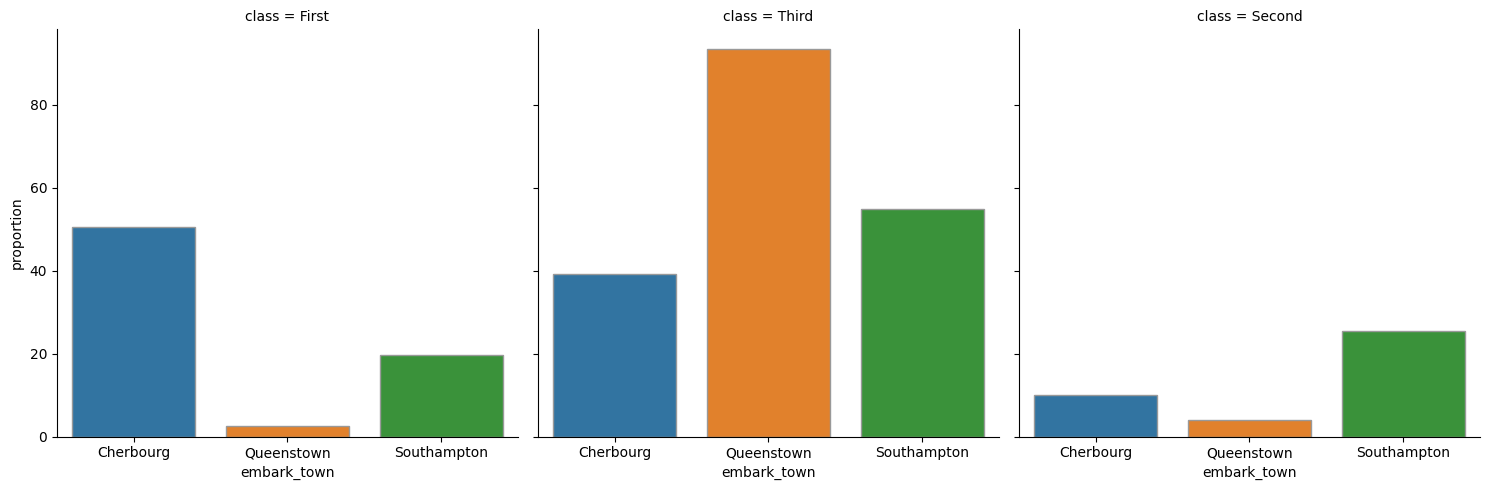

In [231]:
sns.catplot(x="embark_town",
            y = "proportion",
            col="class",
            hue = "embark_town",
            kind="bar", # Ojo, cambio el tipo de gráfico (ahora no "cuento" filas)
            edgecolor=".6",
            data=frecuencias_relativas);
